# Assignment 7 - Nicholas Petr

### PART 2

### 1 - Consider the following optimization problem:


### A. Rewrite the above as an unconstraint problem (use the linear constraint to substitute out  x2 )

In [1]:
f(x) = x^0.5 * (1 - 0.5x)^0.5

f (generic function with 1 method)

### i. Plots the objective function for the feasible range for  x1 .

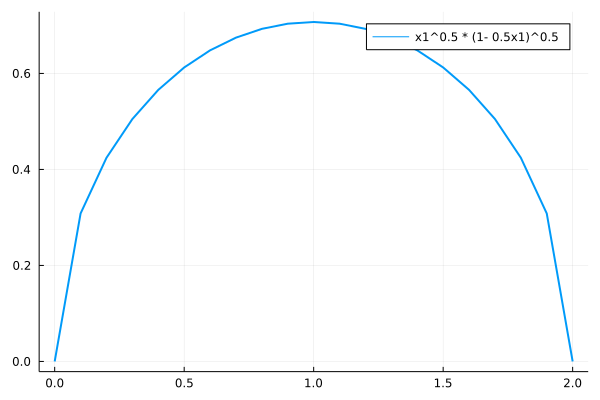

In [2]:
using MTH229
using Plots

x1 = 0:0.1:2

plot(x1,f.(x1), label="x1^0.5 * (1- 0.5x1)^0.5", linewidth=2)          

In [3]:
f(1)

0.7071067811865476

### ii. Write down the first order condition and find the solution (assume an interior solution).

In [4]:
d1(x) = 0.5*x^(-0.5) * (1 - 0.5*x)^0.5 + x^(0.5)*0.5*(1-0.5x)^(-0.5)*-0.5

d1(1)

0.0

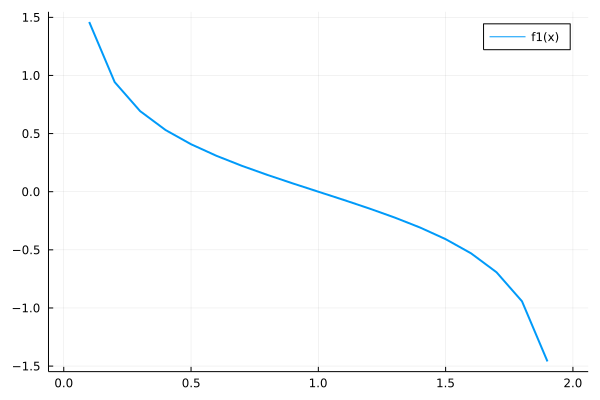

In [5]:
using MTH229
using Plots

plot(x1,d1.(x1), label="f1(x)", linewidth=2)          

### iii. Derive the second derivative of the objective function at the optimal.

In [6]:
d2(x) = -0.25*(x^-1.5)*((1-0.5x)^0.5) + (0.5*(x^-0.5))*0.5*((1-0.5x)^(-0.5))*-0.5+
-0.125*(x^-0.5)*((1-0.5x)^(-0.5))+-0.25*(x^0.5)*(-0.5)*((1-0.5x)^(-1.5))*-0.5

d2(1)

-0.7071067811865476

In [7]:
# ForwardDiff function
using ForwardDiff
d2(x) = ForwardDiff.derivative(d1,x)

d2(1)

-0.7071067811865476

### iv. Evaluate the second derivative at the optimal value of  x1  and for the entire feasible range. Plots your results.

In [8]:
d2(1)

-0.7071067811865476

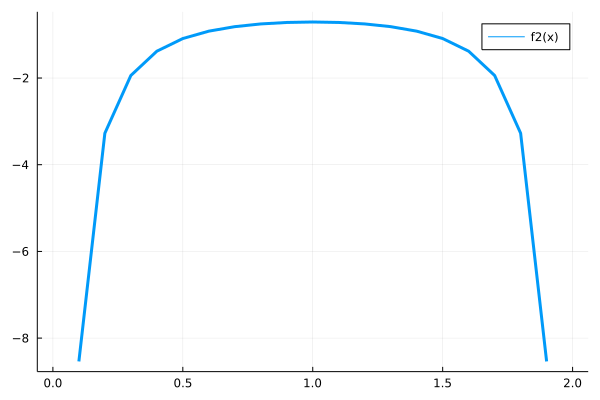

In [9]:
using MTH229
using Plots

plot(x1,d2.(x1), label="f2(x)", linewidth=3)          

### v. Find the solution using a Optim package, and the GoldenSection() solver option.

In [10]:
using Optim, DataFrames

function h(x)
    -1*f(x)
end

# Given a function f and a bracket ax, bx, cx, search for the minimum
#function goldsec(f::Function,a::Float64,b::Float64,c::Float64,tol::Float64)

    C=(3.0-sqrt(5.0))/2.0;
    R=1-C;

    ax = 0.0
    cx = 2.0
    bx = ax+C*(cx-ax)
    
    x0=ax;
    x3=cx;

    if (abs(cx-bx) > abs(bx-ax))
        x1=bx;
        x2=bx+C*(cx-bx);
    else
        x2=bx;
        x1=bx-C*(bx-ax);
    end

    h1=h(x1);
    h2=h(x2);

    tol=1.0e-6;
    k=0;
    resual = DataFrame(k=k,x0=x0,x1=x1,x2=x2,x3=x3,h1=h1,h2=h2);
    while (abs(x3-x0) > tol*(abs(x1)+abs(x2)))
        if (h2 < h1)
            x0=x1
            x1=x2
            x2=R*x1+C*x3
            h1=h2
            h2=h(x2)
        else
            x3=x2
            x2=x1
            x1=R*x2+C*x0
            h2=copy(h1)
            h1=copy(h(x1))
        end
        k=k+1
        push!(resual, ([k,x0,x1,x2,x3,h1,h2]))
    end

resual

,k,x0,x1,x2,x3,h1,h2
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,0,0.0,0.763932,1.23607,2.0,-0.687121,-0.687121
2,1,0.763932,1.23607,1.52786,2.0,-0.687121,-0.600566
3,2,0.763932,1.05573,1.23607,1.52786,-0.706008,-0.687121
4,3,0.763932,0.944272,1.05573,1.23607,-0.706008,-0.706008
5,4,0.763932,0.875388,0.944272,1.05573,-0.701595,-0.706008
6,5,0.875388,0.944272,0.986844,1.05573,-0.706008,-0.707046
7,6,0.944272,0.986844,1.01316,1.05573,-0.707046,-0.707046
8,7,0.944272,0.970583,0.986844,1.01316,-0.706801,-0.707046
9,8,0.970583,0.986844,0.996894,1.01316,-0.707046,-0.707103


### B. Write out the lagrange of the original optimization problem

### l(x,λ) = f(x) + λ^T * h(x) = x1^0.5 * x2^0.5 + λ (0.5*x1 + x2 - 1)

### i. Derive the first order conditions

### ∇x1 L(x,λ) = 0.5*x1^-0.5 * x2^0.5 + 0.5λ = 0

### ∇x2 L(x,λ) = 0.5*x1^0.5 * x2^-0.5 + λ = 0

### ∇λ L(x,λ) = 0.5*x1 + x2 = 1

### ii. Solve the first order conditions and find the lagranger multiplier value

In [11]:
function df(x)
    return [0.5*x[1]^(-0.5)*x[2]^(0.5); 0.5*x[1]^(0.5)*x[2]^(-0.5)]
end

function d2f(x)
    return [-0.25*x[1]^(-1.5)*x[2]^(0.5)    0.25*x[1]^(-0.5)*x[2]^(-0.5);
            0.25*x[1]^(-0.5)*x[2]^(-0.5)    -0.25*x[1]^(0.5)*x[2]^(-1.5)]
end

function h(x)
    return 0.5*x[1] + x[2] -1
end

function dh(x)
    return [0.5 ; 
            1   ]
end

function d2h(x)
    return [0 0 ; 
            0 0 ]
end

tol = 1.0e-5
x0 = [1.0 ; 1.0]
lb0 = 0.0
err=1.0e10
k=1
while err>tol
    dL0 = [df(x0).+dh(x0).*lb0; h(x0)]
    d2L0 = [d2f(x0).+d2h(x0).*lb0 dh(x0);
            dh(x0)' 0]
    dd = -inv(d2L0)*dL0
    x=x0.+dd[1:length(x0)]
    lb=lb0.+dd[(length(x0)+1):(length(x0)+length(lb0))]
    err=maximum(abs.([x0;lb0].-[x;lb]))
    x0,lb0 = x,lb
    println(k,x0,lb0)
    k = k+1
end

1[1.1111111111111112, 0.4444444444444444][-0.6666666666666666]
2[1.0013717421124828, 0.4993141289437586][-0.7027283689263065]
3[1.0000000025811748, 0.49999999870941264][-0.7071061159131552]
4[1.0, 0.5][-0.7071067811865475]


### x1 = 1.0

### x2 = 0.5

### lagranger multiplier value = -0.7071067811865475

### C. Find the solution to the original problem using Julia's NLopt and the LD_SLSQP solver.

In [12]:
using NLopt

function myfunc(x::Vector, grad::Vector)
    if length(grad) > 0
        grad[1] = 0.5*x[1]^(-0.5)*x[2]^(0.5) # df(x) / dx1
        grad[2] = 0.5*x[1]^(0.5)*x[2]^(-0.5) # df(x) / dx2
    end
    return x[1]^(0.5)*x[2]^(0.5) # objective function, f(x)
end

function myconstraint(x::Vector, grad::Vector, a, b)
    if length(grad) > 0
        grad[1] = a*0.5*x[1]^(a-1)
        grad[2] = b*x[2]^(b-1)
    end
    0.5*x[1]^a + x[2]^b - 1
end

opt = Opt(:LD_SLSQP, 2)
opt.lower_bounds = [0.0, 0.0]
opt.upper_bounds = [2.0, 1.0]
opt.xtol_rel = 1e-5

opt.max_objective = myfunc
inequality_constraint!(opt, (x,g) -> myconstraint(x,g,1,1), 1e-8)

(optf,optx,ret) = NLopt.optimize(opt, [1.0, 1.0])

numevals = opt.numevals # the number of function evaluations
println("got $optf at $optx after $numevals iterations")

got 0.7071067811865478 at [1.0000000000000002, 0.5000000000000003] after 2 iterations
